In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


In [3]:
# Создай папку для графиков
output_dir = Path('../presentation/figures')
output_dir.mkdir(parents=True, exist_ok=True)

In [5]:
print("Loading data...")
train = pd.read_csv('../data/raw/train.csv')
labels = pd.read_csv('../data/raw/train_labels.csv')
test = pd.read_csv('../data/raw/test.csv')

Loading data...


In [6]:
print(f"Train shape: {train.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Test shape: {test.shape}")

Train shape: (1961, 558)
Labels shape: (1961, 425)
Test shape: (134, 559)


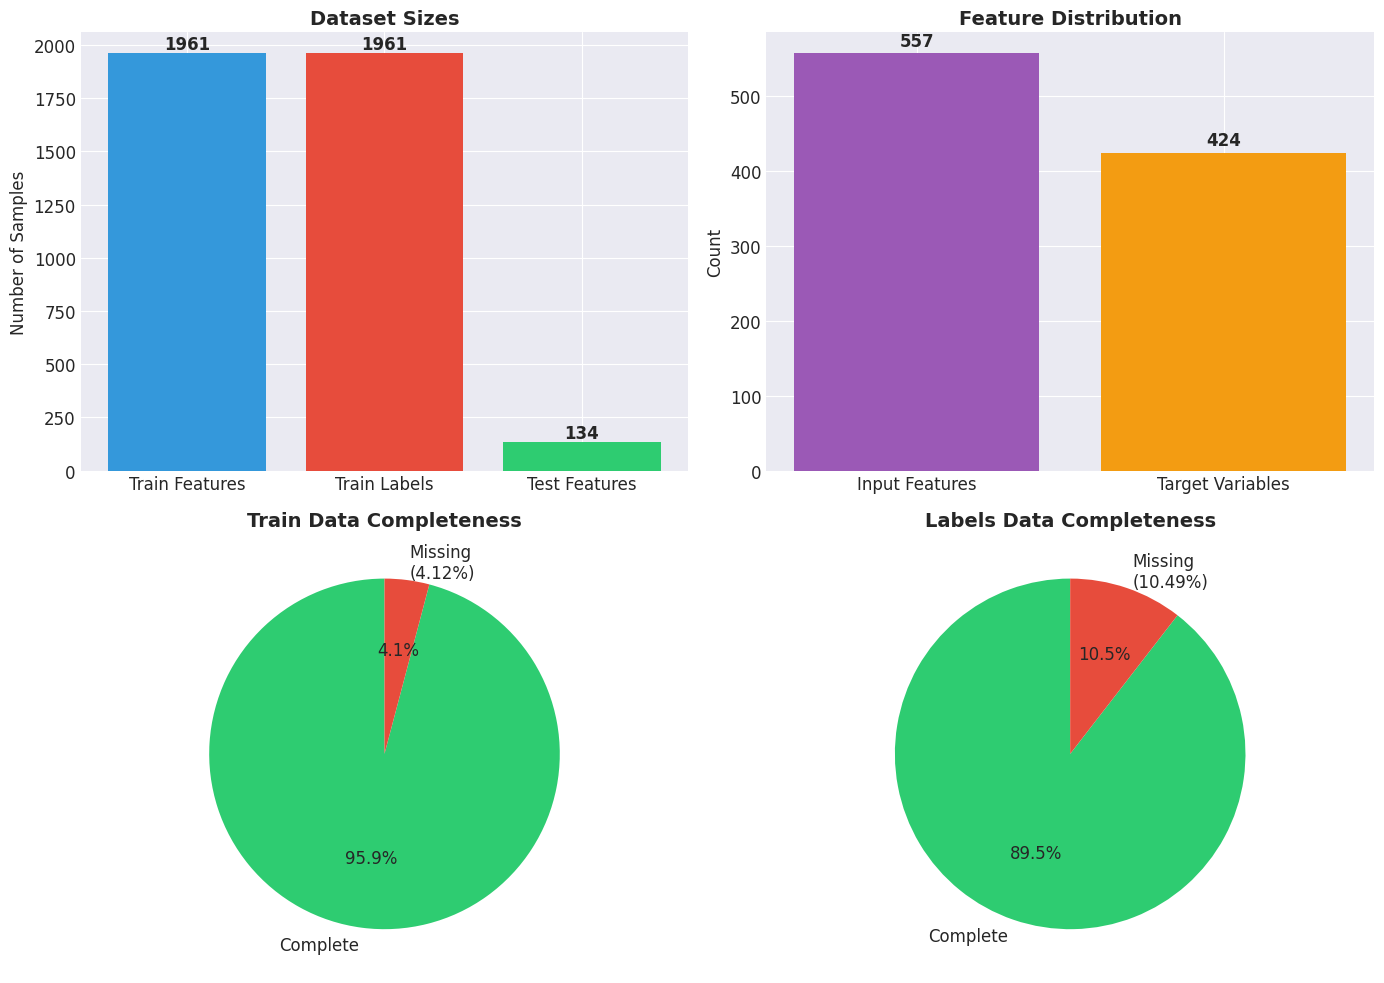


📊 Dataset Overview:
   Train samples: 1961
   Input features: 557
   Target variables: 424
   Missing in train: 4.12%
   Missing in labels: 10.49%


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Dataset sizes
sizes = [train.shape[0], labels.shape[0], test.shape[0]]
names = ['Train Features', 'Train Labels', 'Test Features']
colors = ['#3498db', '#e74c3c', '#2ecc71']

axes[0, 0].bar(names, sizes, color=colors)
axes[0, 0].set_title('Dataset Sizes', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Number of Samples')
for i, v in enumerate(sizes):
    axes[0, 0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Plot 2: Number of features
feature_counts = {
    'Input Features': train.shape[1] - 1,  # excluding date_id
    'Target Variables': labels.shape[1] - 1  # excluding date_id
}
axes[0, 1].bar(feature_counts.keys(), feature_counts.values(), color=['#9b59b6', '#f39c12'])
axes[0, 1].set_title('Feature Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')
for i, (k, v) in enumerate(feature_counts.items()):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Plot 3: Missing values in train
missing_train = train.isnull().sum().sum()
total_train = train.shape[0] * train.shape[1]
missing_pct_train = (missing_train / total_train) * 100

axes[1, 0].pie([100-missing_pct_train, missing_pct_train], 
               labels=['Complete', f'Missing\n({missing_pct_train:.2f}%)'],
               colors=['#2ecc71', '#e74c3c'],
               autopct='%1.1f%%',
               startangle=90)
axes[1, 0].set_title('Train Data Completeness', fontsize=14, fontweight='bold')

# Plot 4: Missing values in labels
missing_labels = labels.isnull().sum().sum()
total_labels = labels.shape[0] * labels.shape[1]
missing_pct_labels = (missing_labels / total_labels) * 100

axes[1, 1].pie([100-missing_pct_labels, missing_pct_labels],
               labels=['Complete', f'Missing\n({missing_pct_labels:.2f}%)'],
               colors=['#2ecc71', '#e74c3c'],
               autopct='%1.1f%%',
               startangle=90)
axes[1, 1].set_title('Labels Data Completeness', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / '01_dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Dataset Overview:")
print(f"   Train samples: {train.shape[0]}")
print(f"   Input features: {train.shape[1] - 1}")
print(f"   Target variables: {labels.shape[1] - 1}")
print(f"   Missing in train: {missing_pct_train:.2f}%")
print(f"   Missing in labels: {missing_pct_labels:.2f}%")

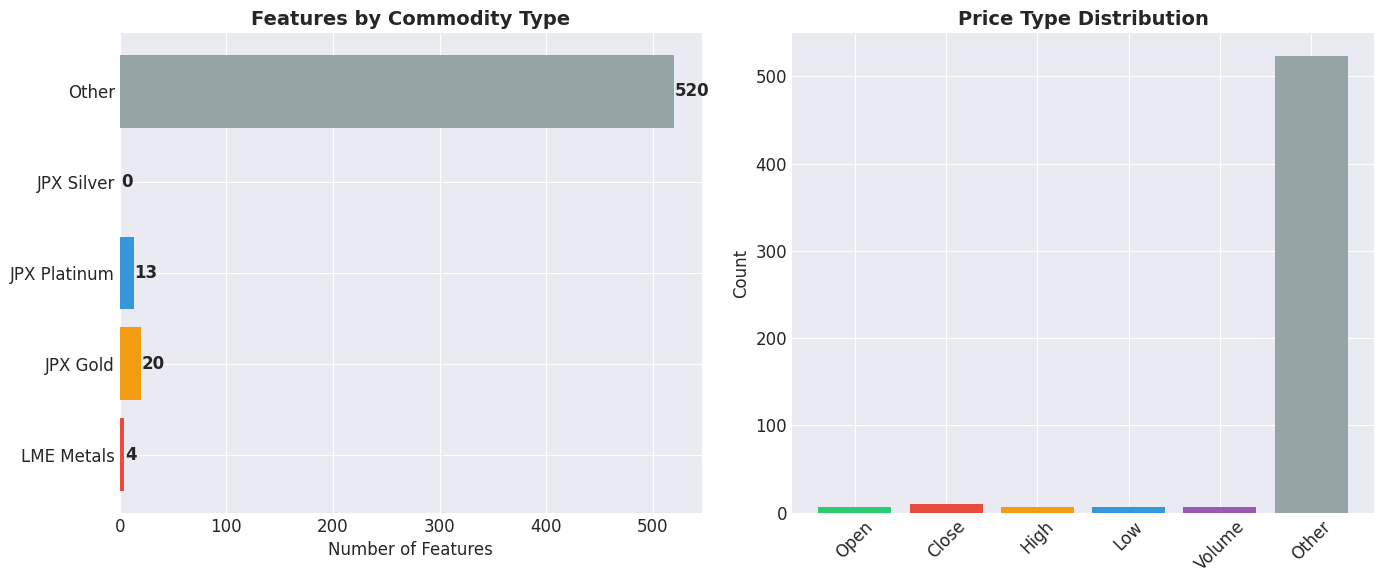


📊 Feature Categories:
   LME Metals: 4 features
   JPX Gold: 20 features
   JPX Platinum: 13 features
   JPX Silver: 0 features
   Other: 520 features


In [8]:
# === СЛАЙД 3: Feature Types ===
feature_cols = [c for c in train.columns if c != 'date_id']

# Categorize features by source
categories = {
    'LME Metals': [],
    'JPX Gold': [],
    'JPX Platinum': [],
    'JPX Silver': [],
    'Other': []
}

for col in feature_cols:
    if 'LME' in col:
        categories['LME Metals'].append(col)
    elif 'Gold' in col:
        categories['JPX Gold'].append(col)
    elif 'Platinum' in col:
        categories['JPX Platinum'].append(col)
    elif 'Silver' in col:
        categories['JPX Silver'].append(col)
    else:
        categories['Other'].append(col)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Feature categories
cat_counts = {k: len(v) for k, v in categories.items()}
axes[0].barh(list(cat_counts.keys()), list(cat_counts.values()), 
             color=['#e74c3c', '#f39c12', '#3498db', '#9b59b6', '#95a5a6'])
axes[0].set_xlabel('Number of Features')
axes[0].set_title('Features by Commodity Type', fontsize=14, fontweight='bold')
for i, v in enumerate(cat_counts.values()):
    axes[0].text(v + 1, i, str(v), va='center', fontweight='bold')

# Plot 2: Feature name types (Open, Close, High, Low, etc.)
price_types = {'Open': 0, 'Close': 0, 'High': 0, 'Low': 0, 'Volume': 0, 'Other': 0}
for col in feature_cols:
    if 'Open' in col:
        price_types['Open'] += 1
    elif 'Close' in col:
        price_types['Close'] += 1
    elif 'High' in col:
        price_types['High'] += 1
    elif 'Low' in col:
        price_types['Low'] += 1
    elif 'Volume' in col:
        price_types['Volume'] += 1
    else:
        price_types['Other'] += 1

axes[1].bar(price_types.keys(), price_types.values(), 
            color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db', '#9b59b6', '#95a5a6'])
axes[1].set_ylabel('Count')
axes[1].set_title('Price Type Distribution', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(output_dir / '02_feature_types.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Feature Categories:")
for cat, features in categories.items():
    print(f"   {cat}: {len(features)} features")

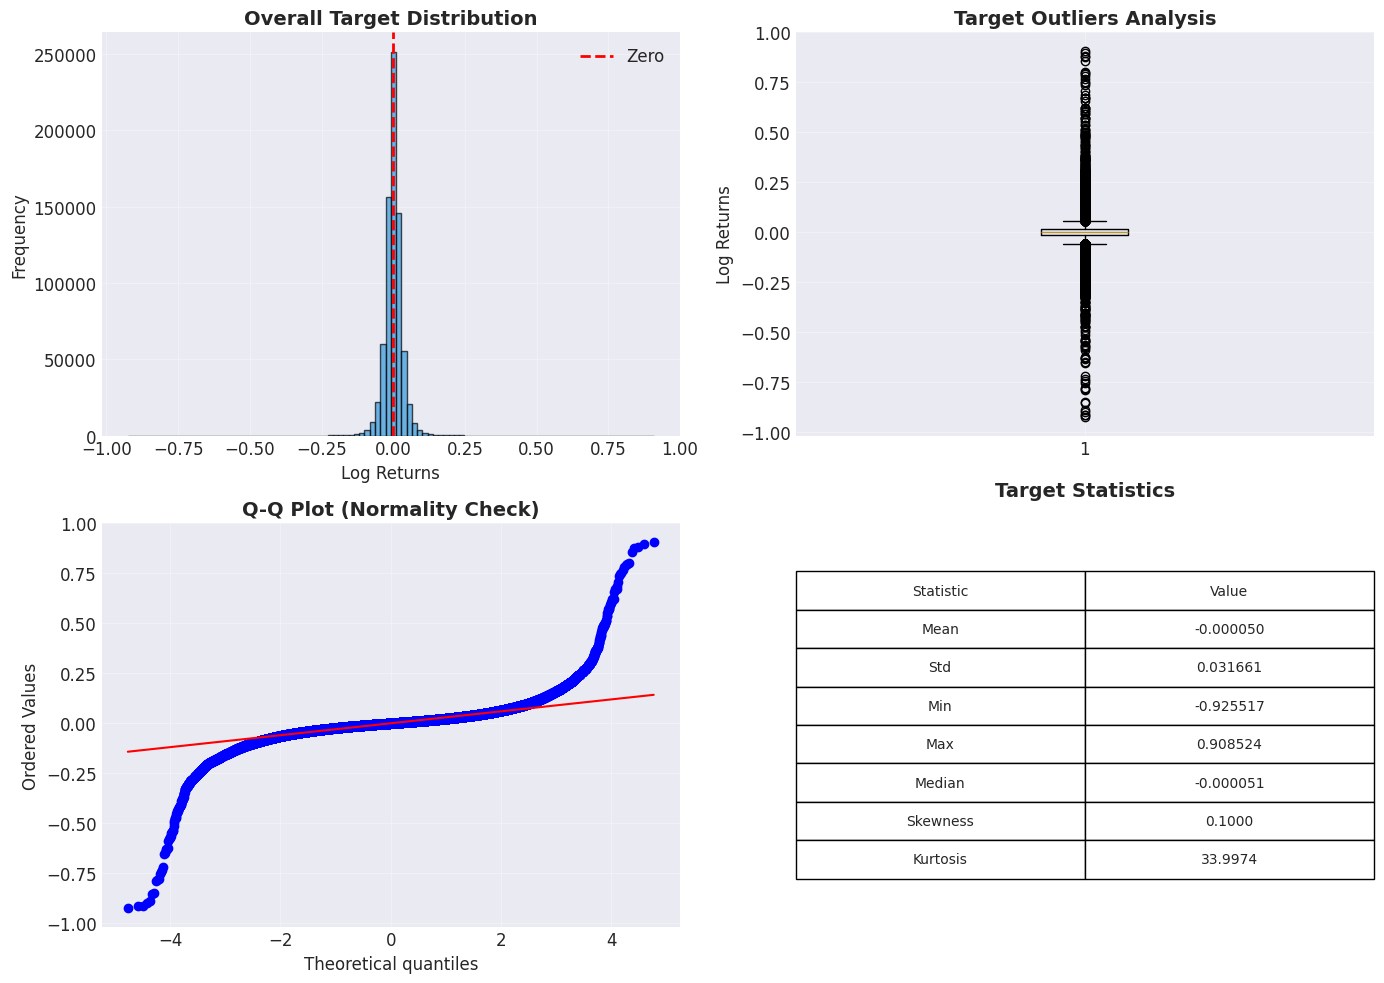


📊 Target Statistics:
   Mean: -0.000050
   Std: 0.031661
   Min: -0.925517
   Max: 0.908524
   Skewness: 0.1000
   Kurtosis: 33.9974


In [9]:
# === СЛАЙД 4: Target Distribution ===
target_cols = [c for c in labels.columns if c.startswith('target_')]
target_data = labels[target_cols].values.flatten()
target_data_clean = target_data[~np.isnan(target_data)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Overall distribution
axes[0, 0].hist(target_data_clean, bins=100, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[0, 0].set_xlabel('Log Returns')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Overall Target Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Box plot
axes[0, 1].boxplot(target_data_clean, vert=True)
axes[0, 1].set_ylabel('Log Returns')
axes[0, 1].set_title('Target Outliers Analysis', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Q-Q plot (check normality)
from scipy import stats
stats.probplot(target_data_clean, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Statistics table
stats_data = {
    'Metric': ['Mean', 'Std', 'Min', 'Max', 'Median', 'Skewness', 'Kurtosis'],
    'Value': [
        f'{np.mean(target_data_clean):.6f}',
        f'{np.std(target_data_clean):.6f}',
        f'{np.min(target_data_clean):.6f}',
        f'{np.max(target_data_clean):.6f}',
        f'{np.median(target_data_clean):.6f}',
        f'{stats.skew(target_data_clean):.4f}',
        f'{stats.kurtosis(target_data_clean):.4f}'
    ]
}
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=[[stats_data['Metric'][i], stats_data['Value'][i]] 
                                    for i in range(len(stats_data['Metric']))],
                         colLabels=['Statistic', 'Value'],
                         cellLoc='center',
                         loc='center',
                         colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 1].set_title('Target Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(output_dir / '03_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Target Statistics:")
print(f"   Mean: {np.mean(target_data_clean):.6f}")
print(f"   Std: {np.std(target_data_clean):.6f}")
print(f"   Min: {np.min(target_data_clean):.6f}")
print(f"   Max: {np.max(target_data_clean):.6f}")
print(f"   Skewness: {stats.skew(target_data_clean):.4f}")
print(f"   Kurtosis: {stats.kurtosis(target_data_clean):.4f}")

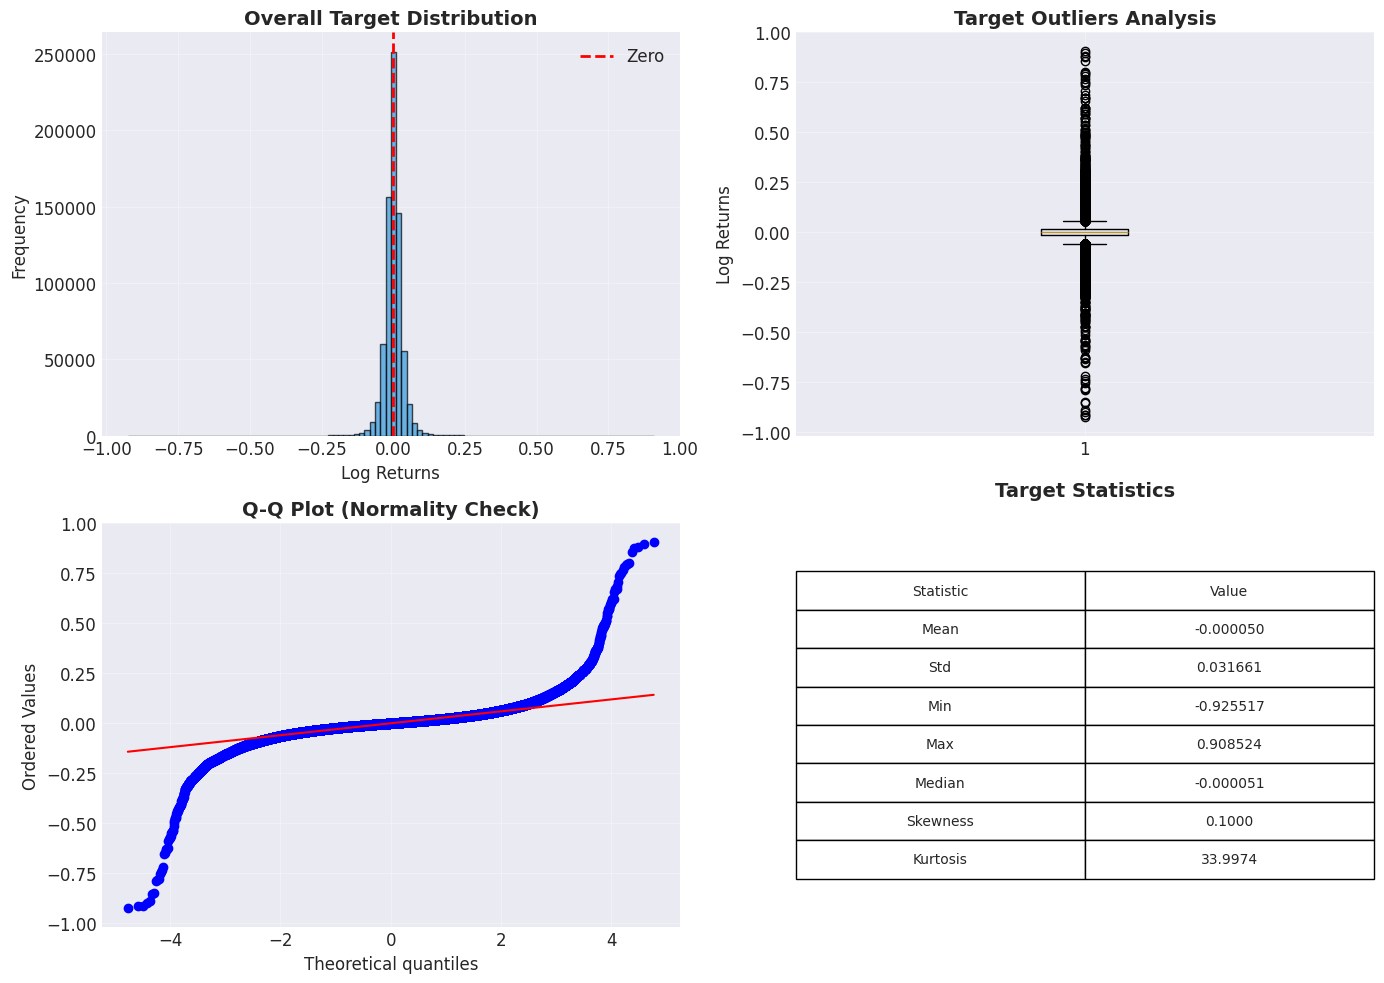


📊 Target Statistics:
   Mean: -0.000050
   Std: 0.031661
   Min: -0.925517
   Max: 0.908524
   Skewness: 0.1000
   Kurtosis: 33.9974


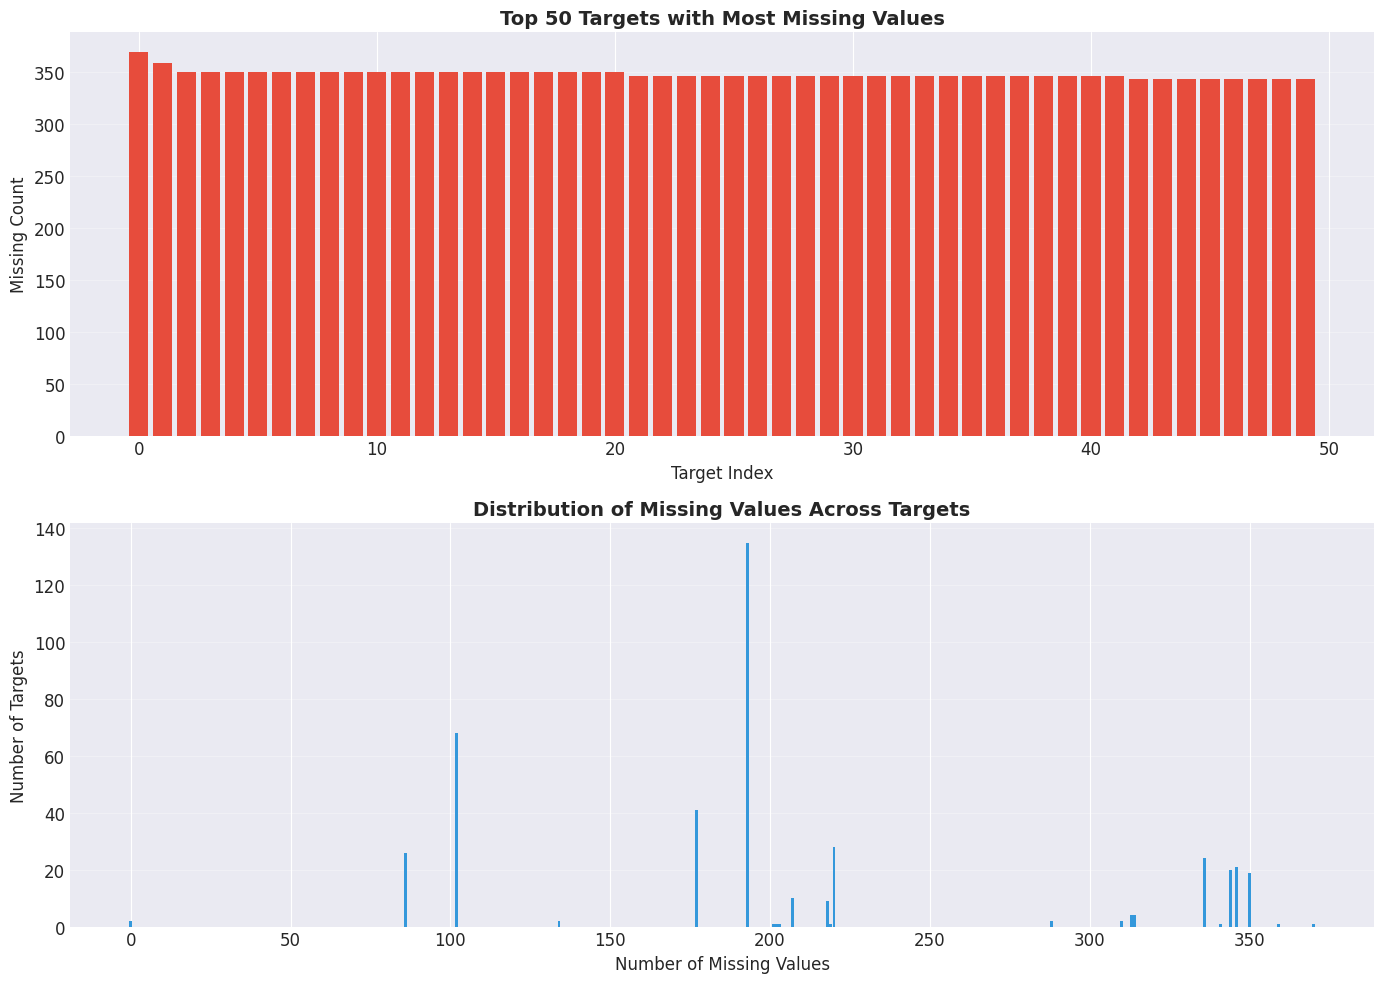


📊 Missing Data Analysis:
   Targets with >10% missing: 150
   Targets with >20% missing: 0
   Max missing in single target: 370 (18.9%)


In [11]:
# === СЛАЙД 5: Missing Data Pattern ===
# Per-target missing values
target_missing = labels[target_cols].isnull().sum().sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Top 50 targets with most missing values
top_missing = target_missing.head(50)
axes[0].bar(range(len(top_missing)), top_missing.values, color='#e74c3c')
axes[0].set_xlabel('Target Index')
axes[0].set_ylabel('Missing Count')
axes[0].set_title('Top 50 Targets with Most Missing Values', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Missing values distribution
missing_counts = target_missing.value_counts().sort_index()
axes[1].bar(missing_counts.index, missing_counts.values, color='#3498db')
axes[1].set_xlabel('Number of Missing Values')
axes[1].set_ylabel('Number of Targets')
axes[1].set_title('Distribution of Missing Values Across Targets', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / '04_missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Missing Data Analysis:")
print(f"   Targets with >10% missing: {(target_missing > len(labels) * 0.1).sum()}")
print(f"   Targets with >20% missing: {(target_missing > len(labels) * 0.2).sum()}")
print(f"   Max missing in single target: {target_missing.max()} ({target_missing.max()/len(labels)*100:.1f}%)")

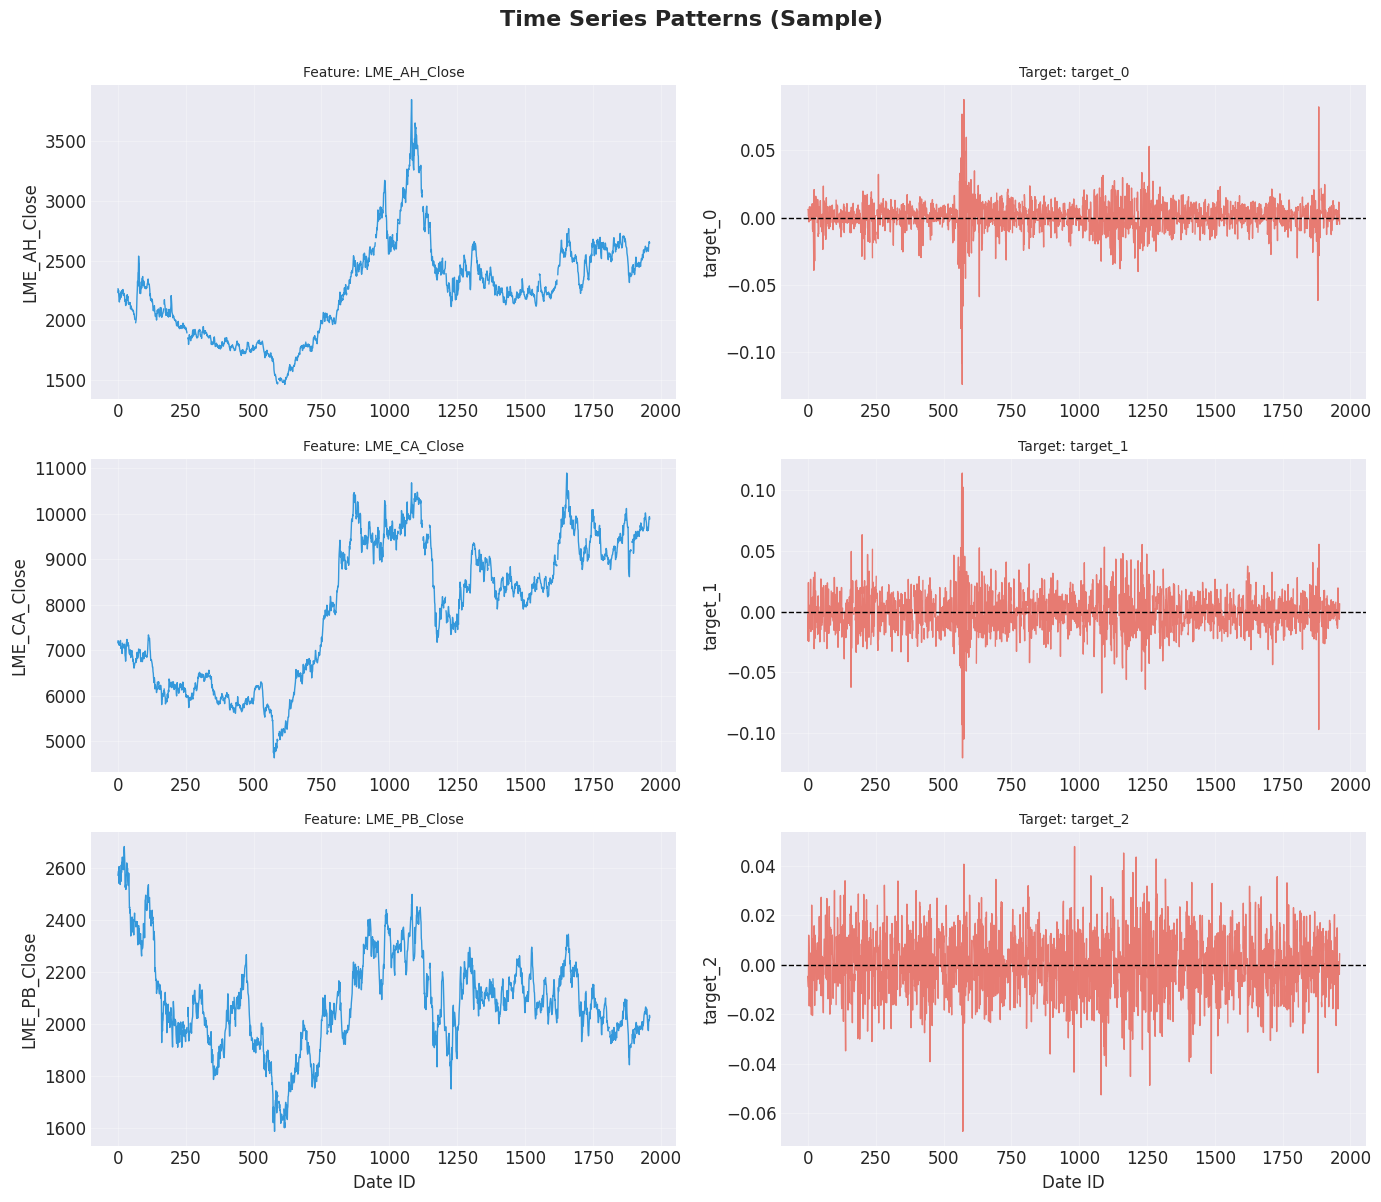

In [12]:
# === СЛАЙД 6: Time Series Patterns ===
# Merge data
df = train.merge(labels, on='date_id')

# Sample a few features and targets for visualization
sample_features = feature_cols[:3]
sample_targets = target_cols[:3]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot features
for i, col in enumerate(sample_features):
    axes[i, 0].plot(df['date_id'], df[col], linewidth=1, color='#3498db')
    axes[i, 0].set_ylabel(col[:30] + '...' if len(col) > 30 else col)
    axes[i, 0].set_title(f'Feature: {col[:40]}', fontsize=10)
    axes[i, 0].grid(True, alpha=0.3)

# Plot targets
for i, col in enumerate(sample_targets):
    axes[i, 1].plot(df['date_id'], df[col], linewidth=1, color='#e74c3c', alpha=0.7)
    axes[i, 1].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i, 1].set_ylabel(col)
    axes[i, 1].set_title(f'Target: {col}', fontsize=10)
    axes[i, 1].grid(True, alpha=0.3)

axes[2, 0].set_xlabel('Date ID')
axes[2, 1].set_xlabel('Date ID')

plt.suptitle('Time Series Patterns (Sample)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(output_dir / '05_timeseries_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

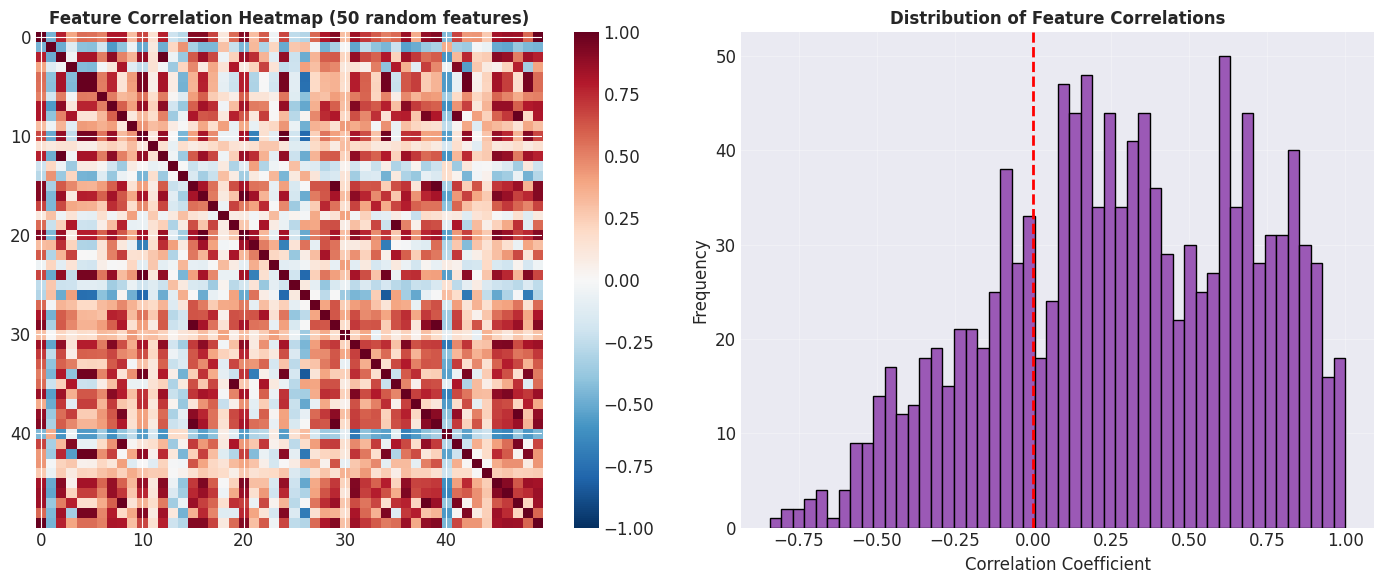


📊 Correlation Analysis:
   Mean absolute correlation: 0.4156
   Highly correlated pairs (>0.9): 53


In [13]:
# === СЛАЙД 7: Correlation Analysis ===
# Sample correlation (full matrix too large)
sample_size = 50
sample_feat_idx = np.random.choice(len(feature_cols), sample_size, replace=False)
sample_features = [feature_cols[i] for i in sample_feat_idx]

corr_matrix = df[sample_features].corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Heatmap
im = axes[0].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
axes[0].set_title('Feature Correlation Heatmap (50 random features)', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=axes[0])

# Plot 2: Correlation distribution
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
axes[1].hist(corr_values, bins=50, color='#9b59b6', edgecolor='black')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Feature Correlations', fontsize=12, fontweight='bold')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / '06_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Correlation Analysis:")
print(f"   Mean absolute correlation: {np.abs(corr_values).mean():.4f}")
print(f"   Highly correlated pairs (>0.9): {(np.abs(corr_values) > 0.9).sum()}")

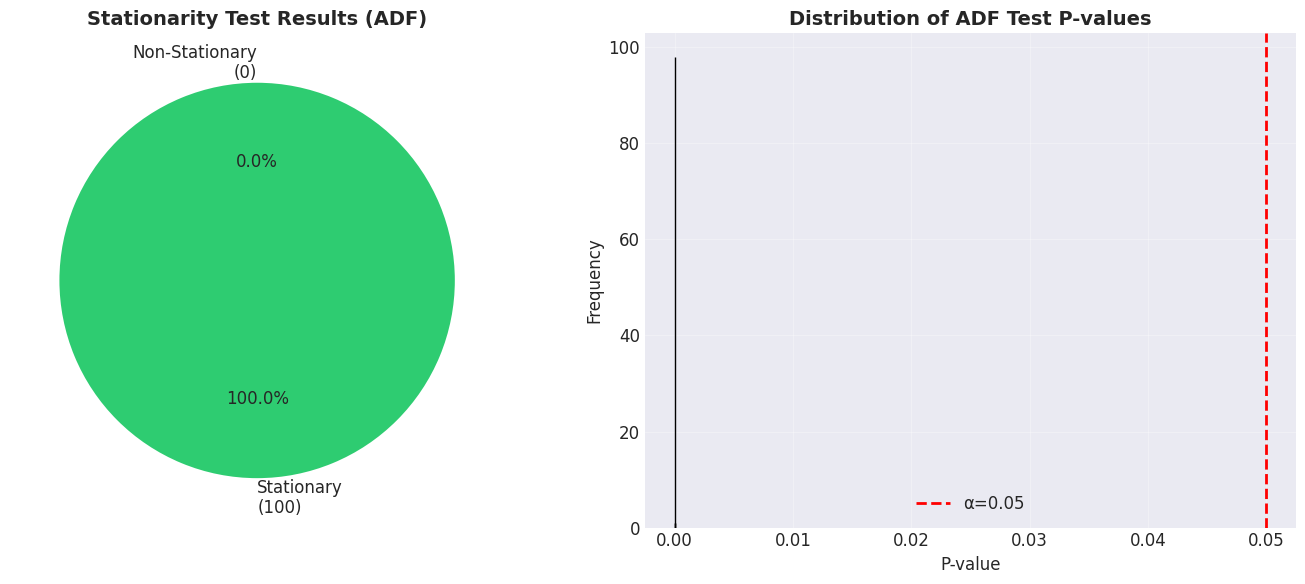


📊 Stationarity Analysis:
   Stationary targets: 100/100 (100.0%)
   Mean p-value: 0.0000


In [15]:
# === СЛАЙД 8: Stationarity (Augmented Dickey-Fuller Test) ===
from statsmodels.tsa.stattools import adfuller

# Test on sample targets
adf_results = []
sample_targets_test = target_cols[:100]  # test first 100

for col in sample_targets_test:
    data = df[col].dropna()
    if len(data) > 10:
        try:
            result = adfuller(data)
            adf_results.append({
                'target': col,
                'adf_stat': result[0],
                'p_value': result[1],
                'stationary': result[1] < 0.05
            })
        except:
            pass

adf_df = pd.DataFrame(adf_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Stationarity ratio
stationary_count = adf_df['stationary'].sum()
non_stationary_count = len(adf_df) - stationary_count

axes[0].pie([stationary_count, non_stationary_count],
            labels=[f'Stationary\n({stationary_count})', f'Non-Stationary\n({non_stationary_count})'],
            colors=['#2ecc71', '#e74c3c'],
            autopct='%1.1f%%',
            startangle=90)
axes[0].set_title('Stationarity Test Results (ADF)', fontsize=14, fontweight='bold')

# Plot 2: P-value distribution
axes[1].hist(adf_df['p_value'], bins=30, color='#3498db', edgecolor='black')
axes[1].axvline(0.05, color='red', linestyle='--', linewidth=2, label='α=0.05')
axes[1].set_xlabel('P-value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of ADF Test P-values', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / '07_stationarity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Stationarity Analysis:")
print(f"   Stationary targets: {stationary_count}/{len(adf_df)} ({stationary_count/len(adf_df)*100:.1f}%)")
print(f"   Mean p-value: {adf_df['p_value'].mean():.4f}")

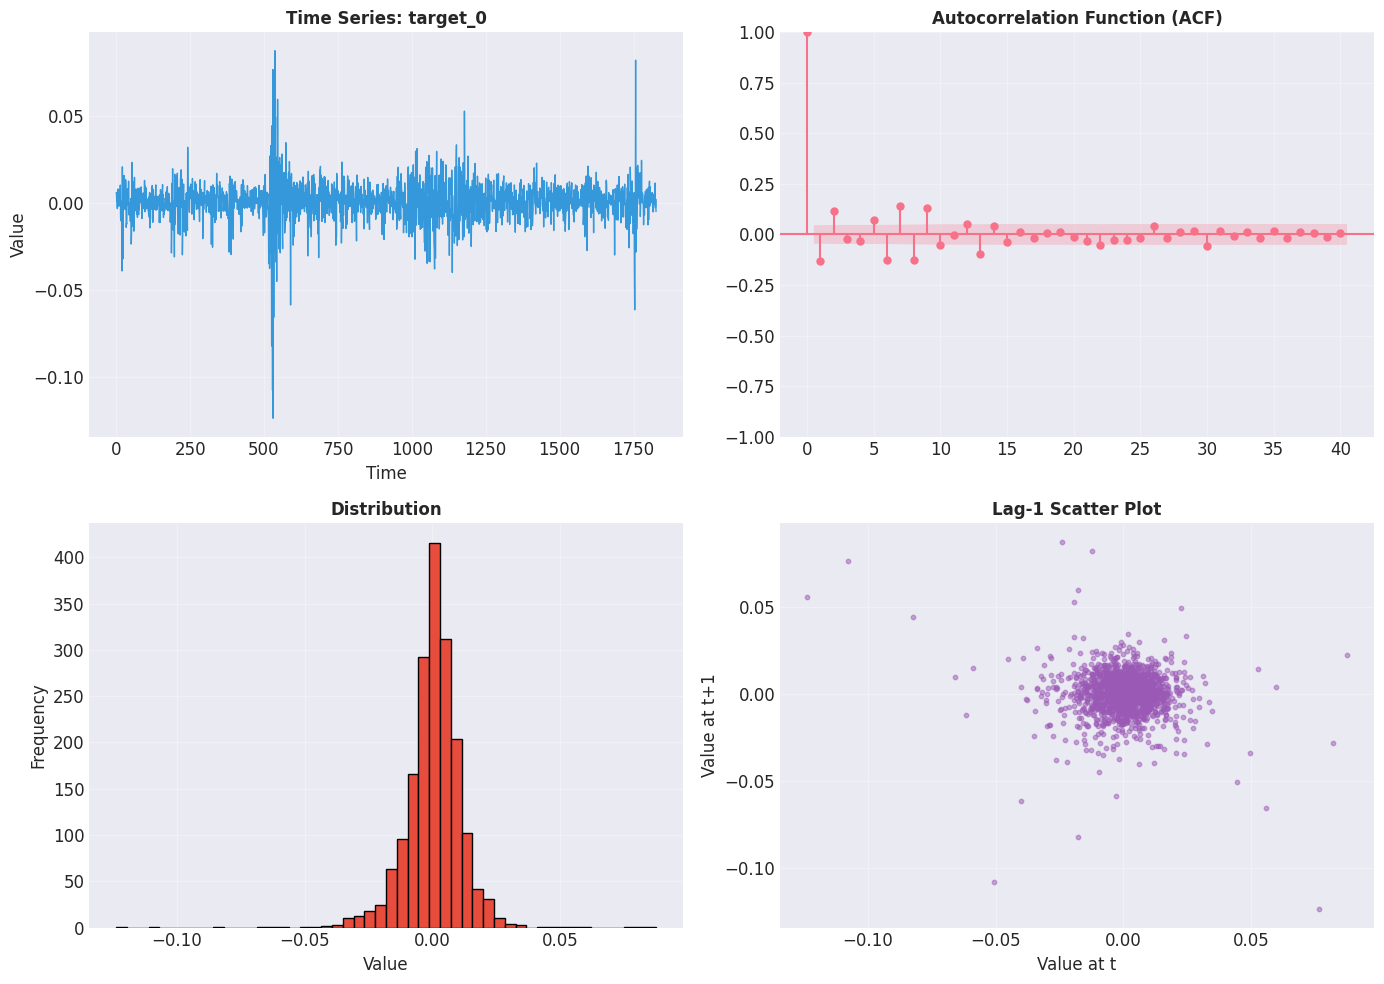

In [16]:
# === СЛАЙД 9: Autocorrelation Analysis ===
from statsmodels.graphics.tsaplots import plot_acf

# Pick one representative target
sample_target = target_cols[0]
data = df[sample_target].dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Time series
axes[0, 0].plot(data.values, linewidth=1, color='#3498db')
axes[0, 0].set_title(f'Time Series: {sample_target}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: ACF
plot_acf(data, lags=40, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation Function (ACF)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution
axes[1, 0].hist(data, bins=50, color='#e74c3c', edgecolor='black')
axes[1, 0].set_title('Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Lag scatter plot
axes[1, 1].scatter(data[:-1], data[1:], alpha=0.5, s=10, color='#9b59b6')
axes[1, 1].set_xlabel('Value at t')
axes[1, 1].set_ylabel('Value at t+1')
axes[1, 1].set_title('Lag-1 Scatter Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / '08_autocorrelation.png', dpi=300, bbox_inches='tight')
plt.show()

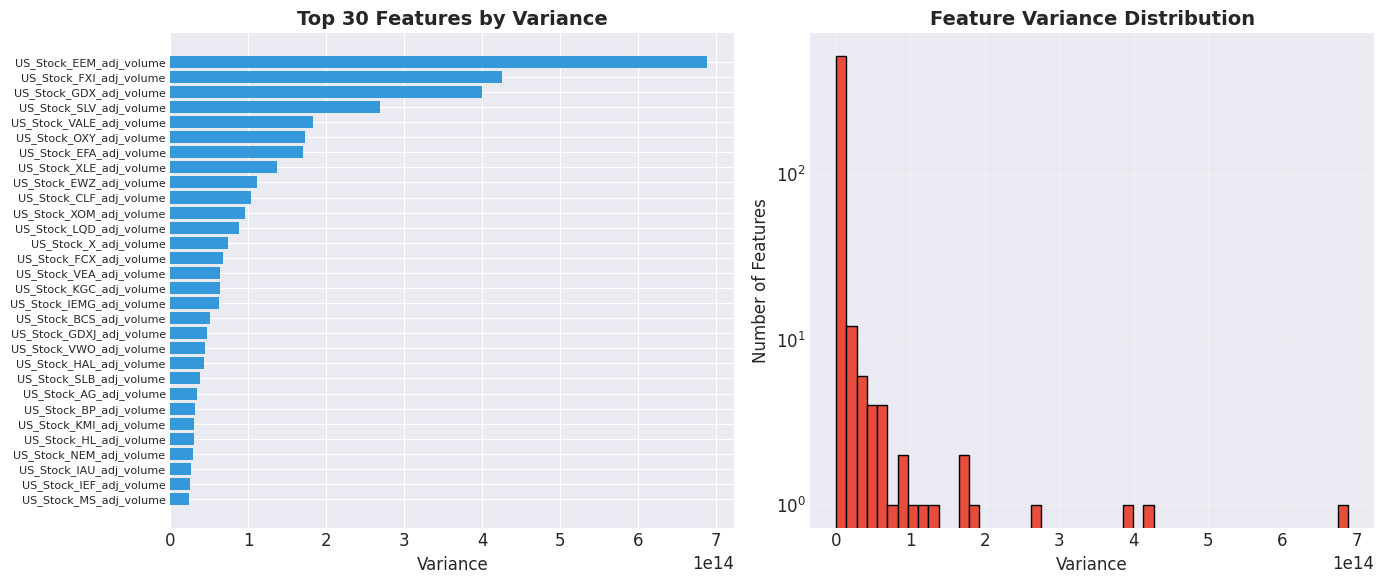


📊 Feature Importance (by variance):
   Top 5 features:
      1. US_Stock_EEM_adj_volume: 688683986306895.88
      2. US_Stock_FXI_adj_volume: 425224483635297.94
      3. US_Stock_GDX_adj_volume: 399323508159495.38
      4. US_Stock_SLV_adj_volume: 269306611520094.41
      5. US_Stock_VALE_adj_volume: 183063915300453.22


In [17]:
# === СЛАЙД 10: Feature Importance (Variance) ===
# Calculate variance for each feature
feature_variance = train[feature_cols].var().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Top 30 features by variance
top_features = feature_variance.head(30)
axes[0].barh(range(len(top_features)), top_features.values, color='#3498db')
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels([f[:30] for f in top_features.index], fontsize=8)
axes[0].set_xlabel('Variance')
axes[0].set_title('Top 30 Features by Variance', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Plot 2: Variance distribution
axes[1].hist(feature_variance.values, bins=50, color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Variance')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Feature Variance Distribution', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / '09_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Feature Importance (by variance):")
print(f"   Top 5 features:")
for i, (feat, var) in enumerate(feature_variance.head(5).items(), 1):
    print(f"      {i}. {feat}: {var:.2f}")

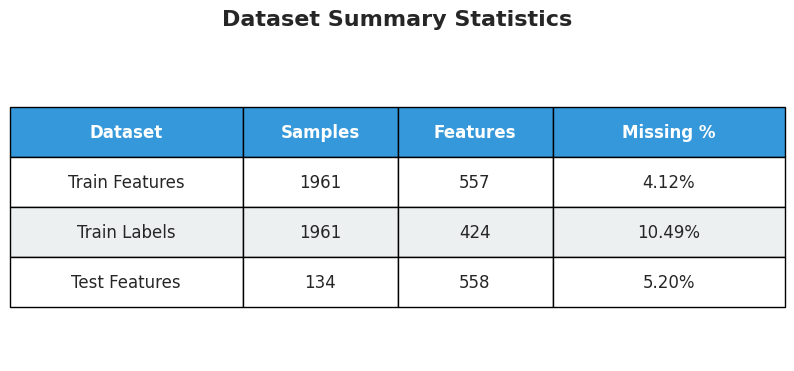

In [18]:
# === СЛАЙД 11: Summary Statistics Table ===
summary_stats = {
    'Dataset': ['Train Features', 'Train Labels', 'Test Features'],
    'Samples': [train.shape[0], labels.shape[0], test.shape[0]],
    'Features': [train.shape[1]-1, labels.shape[1]-1, test.shape[1]-1],
    'Missing %': [
        f"{(train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100):.2f}%",
        f"{(labels.isnull().sum().sum() / (labels.shape[0] * labels.shape[1]) * 100):.2f}%",
        f"{(test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100):.2f}%"
    ]
}

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=[[summary_stats['Dataset'][i],
                            summary_stats['Samples'][i],
                            summary_stats['Features'][i],
                            summary_stats['Missing %'][i]]
                           for i in range(len(summary_stats['Dataset']))],
                colLabels=['Dataset', 'Samples', 'Features', 'Missing %'],
                cellLoc='center',
                loc='center',
                colWidths=[0.3, 0.2, 0.2, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 3)

# Style header
for i in range(4):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, 4):
    for j in range(4):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#ecf0f1')

plt.title('Dataset Summary Statistics', fontsize=16, fontweight='bold', pad=20)
plt.savefig(output_dir / '10_summary_table.png', dpi=300, bbox_inches='tight')
plt.show()